### This notebook contains the different techniques you can use on your data to transform the images inorder for your model to read it better. 

In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

### Function to Sharpen Image 

In [ ]:
image = train_images[5]


kernel = np.array([[0, -1, 0], #kernel for sharpening image
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

### Function to Blur Image

In [ ]:
img_blur = cv2.GaussianBlur(image, (3,3), 0) 

### Function to Preform Edge Detection
NOTE: it is typical to blur before using edge detection hence why the image inputted is not the original image but rather the blurred image from the previous cell. 

In [ ]:
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection

### Combing Multiple Filters:  Blurring then Sharpening 

In [ ]:
image_sharp_with_blur = cv2.filter2D(src=img_blur, ddepth=-1, kernel=kernel)

### Plotting the Image Modifications 

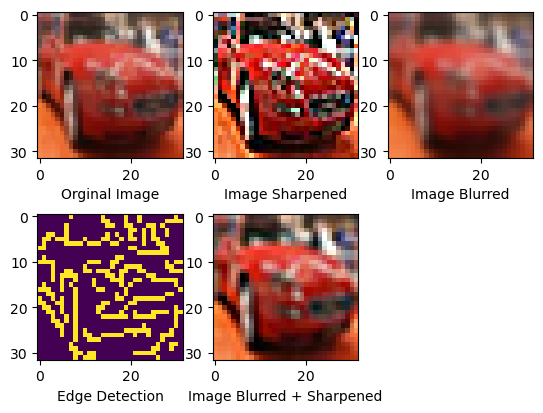

In [2]:
plt.subplot(2,3,1)
plt.imshow(image)
plt.xlabel("Orginal Image")
plt.subplot(2,3,2)
plt.imshow(image_sharp)
plt.xlabel("Image Sharpened")
plt.subplot(2,3,3)
plt.imshow(img_blur)
plt.xlabel("Image Blurred")
plt.subplot(2,3,4)
plt.imshow(edges)
plt.xlabel("Edge Detection")
plt.subplot(2,3,5)
plt.xlabel("Image Blurred + Sharpened")
plt.imshow(image_sharp_with_blur)